# Gradient Descent Algorithm

### Import the lib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# One neuron(No Hidden Layer) - One neuron output
# Data Set
X=np.array([0.1,0.3,0.4,0.7,0.2,0.8,0.4,0.35])
Y=np.array([0.5,0.45,0.56,0.75,0.35,0.3,0.67,0.8])

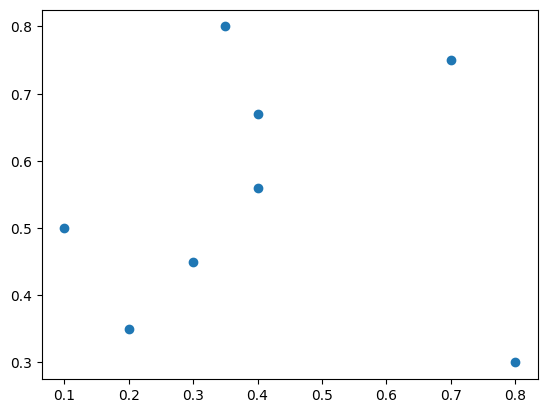

In [ ]:
#Scatter plotting
plt.scatter(X,Y) #Cheacking if it can linearly separable

In [ ]:
#Feed forward
w_int = 0.3
b_int = 1
y_hat = []
def sigmoid(a):
    return 1/(1+np.exp(-a))

#Cal feed foward
for x in X:
    a11 = w_int*x + b_int
    y_hat.append(sigmoid(a11).round(4))
y_hat

[0.7369, 0.7484, 0.754, 0.7703, 0.7427, 0.7756, 0.754, 0.7512]

In [ ]:
Y

array([0.5 , 0.45, 0.56, 0.75, 0.35, 0.3 , 0.67, 0.8 ])

In [ ]:
# Cal Error

for (y,ye) in zip(Y,y_hat):
  e= (y-ye)**2 #We dont use abs error
  print(e)

0.05612161
0.08904255999999997
0.03763599999999998
0.0004120899999999994
0.15421329000000003
0.22619535999999996
0.007055999999999994
0.0023814400000000064


In [ ]:
err = 0
for x,y in zip(X,Y):
  a11 = w_int*x + b_int
  y_hat = sigmoid(a11)
  err += (y-y_hat)**2
print(err) #This will used for gradiant

0.5730074151302901


### Stochastic GD

In [ ]:
def grad_w(x,y,w,b):# with respect to weight (w)
  a11 = w*x + b
  y_hat = sigmoid(a11)
  grad = -2*(y-y_hat)*y_hat*(1-y_hat)*x
  return grad

In [ ]:
grad_w(0.1,0.5,0.3,1)

0.009186217614096324

In [ ]:
def grad_b(x,y,w,b):# With respect bias (b)
  a11 = w*x + b
  y_hat = sigmoid(a11)
  grad = -2*(y-y_hat)*y_hat*(1-y_hat) #Removing x
  return grad

In [ ]:
grad_b(0.1,0.5,0.3,1)

0.09186217614096324

In [ ]:
w_int = 0.3
b_int = 0

In [ ]:
eta = 0.9 #Learning Rate
w_new = w_int - eta*grad_w(0.1,0.5,0.3,0)
b_new = b_int - eta*grad_b(0.1,0.5,0.3,0)
print(w_new,b_new)

0.299662601230639 -0.003373987693610334


In [ ]:
#Using the new updated value
w_new1 = w_new - eta*grad_w(0.3,0.45,w_new,b_new)
b_new1 = b_new - eta*grad_b(0.3,0.45,w_new,b_new)
print(w_new1,b_new1)




0.29001228311546956 -0.035541714744174994


In [ ]:
w= 0.3; b = 0 ;eta = 0.9
for (x_val,y_val) in zip(X,Y):
  dw =grad_w(x_val,y_val,w,b)
  db =grad_b(x_val,y_val,w,b)
  w = w - eta*dw
  b = b - eta*db
  print(w,b)

0.299662601230639 -0.003373987693610334
0.29001228311546956 -0.035541714744174994
0.2971817807835805 -0.017617970573897676
0.36040738481072776 0.0727043208934556
0.343742870254412 -0.010618251888123167
0.24973883846894995 -0.12812329161995076
0.28160265541755625 -0.04846374924843505
0.32685209451992864 0.08082036247262894


In [ ]:
w= 0.3; b = 0 ;eta = 0.9; epochs = 10
J = []
for e in range(epochs):
  err = 0
  for (x_val,y_val) in zip(X,Y):
    dw =grad_w(x_val,y_val,w,b)
    db =grad_b(x_val,y_val,w,b)
    w = w - eta*dw
    b = b - eta*db
    err += (y_val-sigmoid(w*x_val+b))**2
  J.append([w,b,err/len(X)])

In [ ]:
journal = pd.DataFrame(J,columns=['w','b','Loss'])
journal.index.name = 'epochs'
journal.head(1)

,w,b,Loss
epochs,,,
0,0.326852,0.08082,0.024419


<Axes: xlabel='epochs'>

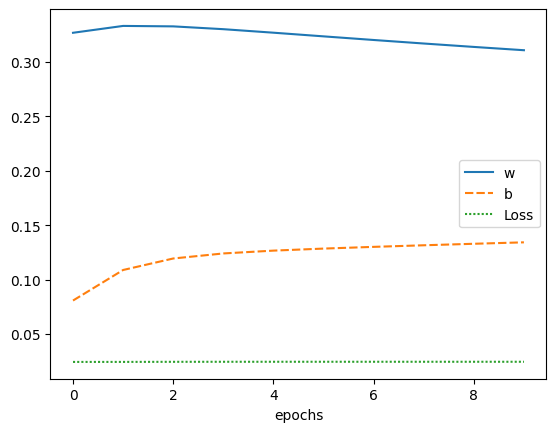

In [ ]:
fig,ax = plt.subplots()
sns.lineplot(journal,ax=ax)

<Axes: xlabel='epochs', ylabel='Loss'>

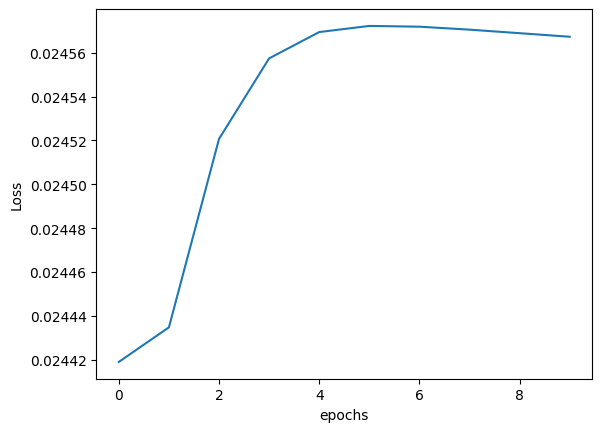

In [ ]:
sns.lineplot(journal,x="epochs",y='Loss')

## WEEK 5

### Regularization Techniques

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [ ]:
iris = load_iris()
#print(iris.DESCR)
data = iris.data#[:,:]#to take 2 col,which to : which
labels = iris.target

In [ ]:
print(iris.filename)# to get the path of the file stored

iris.csv


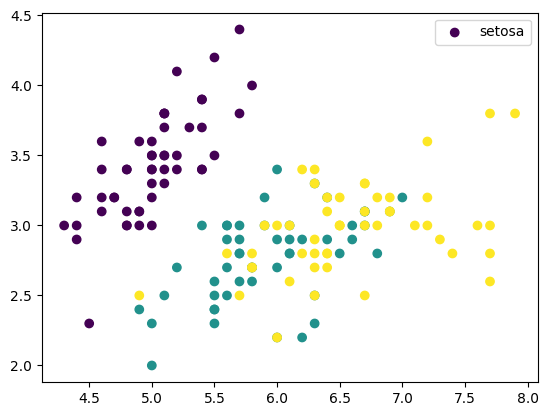

In [ ]:
plt.scatter(data[:,0],data[:,1],c=labels)
plt.legend(iris.target_names)
plt.show()

## Multiclass classification  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tqdm.notebook import tqdm

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(data,labels,
                                               test_size=0.2,
                                               random_state=0) #val = testing,random can be any number

In [ ]:
enc = OneHotEncoder()
y_oh_train = enc.fit_transform(np.expand_dims(y_train,1)).toarray()# np.expand_dims(y_train,1) transforming the dataset into 120*1 dim
y_oh_val = enc.transform(np.expand_dims(y_val,1)).toarray()
# 0 = setosa
# 1 = versicolor
# 2 = virginica

In [ ]:
class FFNetwork:
  def __init__(self,num_hidden=150, epochs = 1):
      self.layer_sizes = [4,num_hidden,3]
      self.epochs = epochs
      self.params = {
          "W1":np.random.randn(self.layer_sizes[0],self.layer_sizes[1]), #W1(input*h1), W2(h1*output)
          "W2":np.random.randn(self.layer_sizes[1],self.layer_sizes[2]),
          "B1":np.random.randn(1,self.layer_sizes[1]),
          "B2":np.random.randn(1,self.layer_sizes[2])
      }
      self.A1 = []
      self.A2 = []
      self.H1 = []
      self.H2 = []
      self.O = []
      self.gradient = {}
      #print(self.params["W1"])

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))

  def softmax(self,x):
    exps =  np.exp(x)
    return exps/np.sum(exps,axis=1).reshape(-1,1) #axis = 1 (sumbit arround the rows)

  def forward_pass(self,x,params = None):
    if params is None:
      params = self.params #we pass the first inilalized value
    self.A1 = np.matmul(x,params["W1"]) + params["B1"]
    self.H1 = self.sigmoid(self.A1)
    self.A2 = np.matmul(self.H1,params["W2"]) + params["B2"]
    self.H2 = self.softmax(self.A2)
    return self.H2

    #self.O = self.softmax(self.H1) # N * 2
    #self.O = np.dot(self.A1, self.params["W2"])
    #print(self.O)

  def grad(self,x,y,params = None):
    if params is None:
        params = self.params
    self.forward_pass(x,params)
    self.gradient["dA2"] = self.H2 - y
    self.gradient["dW2"] = np.matmul(self.H1.T,self.gradient["dA2"])
    self.gradient["dB2"] = np.sum(self.gradient["dA2"],axis=0).reshape(1,-1)
    self.gradient["dH1"] = np.matmul(self.gradient["dA2"],params["W2"].T)
    self.gradient["dA1"] = np.multiply(self.gradient["dH1"],self.sigmoid(self.H1))
    self.gradient["dW1"] = np.matmul(x.T,self.gradient["dA1"])
    self.gradient["dB1"] = np.sum(self.gradient["dA1"],axis=0).reshape(1,-1)
    #print(self.gradient["dW1"])

  def predict(self,x_val):
    y_pred = self.forward_pass(x_val)
    return np.array(y_pred).squeeze()

  def fit(self,x,y,eta = 0.2):
    for num_epoch in tqdm(range(self.epochs)):
      m= x.shape[0]
      self.grad(x,y)
      self.params["W1"] -= eta*1.0/m*self.gradient["dW1"] + 2.0/m*self.params["W1"]
      self.params["W2"] -= eta*1.0/m*self.gradient["dW2"] + 2.0/m*self.params["W2"]
      self.params["B2"] -= eta*1.0/m*self.gradient["dB2"]
      self.params["B1"] -= eta*1.0/m*self.gradient["dB1"]
      #print(self.params["W1"])




In [ ]:
model = FFNetwork()
model.fit(x_train,y_oh_train)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
sigmoid(3)

0.9525741268224334

In [ ]:
model.predict(x_val)[:3]


array([[9.99993175e-01, 6.82460821e-06, 2.60320517e-15],
       [9.99999379e-01, 6.20667505e-07, 5.85745085e-17],
       [9.99995585e-01, 4.41455011e-06, 3.57883800e-14]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def get_accuracy(x_train,y_train,x_val,y_val):
  #train acc
  y_pred_train = model.predict(x_train)
  y_pred_train = np.argmax(y_pred_train,axis=1)# the max postion in the array
  acc_train = accuracy_score(y_train,y_pred_train)*100

  # valodation acc
  y_pred_val = model.predict(x_val)
  y_pred_val = np.argmax(y_pred_val,axis=1)
  acc_val = accuracy_score(y_val,y_pred_val)*100
  return np.array([acc_train,acc_val])


In [ ]:
accs = []
for i in range(100,1001,100):
  model = FFNetwork(epochs=i)
  model.fit(x_train,y_oh_train)
  accs.append([i,get_accuracy(x_train,y_train,x_val,y_val)])#val - testing

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/700 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
accs

[[100, array([75.83333333, 60.        ])],
 [200, array([81.66666667, 86.66666667])],
 [300, array([70., 60.])],
 [400, array([70.83333333, 60.        ])],
 [500, array([71.66666667, 60.        ])],
 [600, array([73.33333333, 60.        ])],
 [700, array([78.33333333, 86.66666667])],
 [800, array([71.66666667, 60.        ])],
 [900, array([73.33333333, 86.66666667])],
 [1000, array([70.83333333, 60.        ])]]

# Doing it in Pytorch

In [ ]:
import torch

#### Genterate Dataset

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
data, labels = make_blobs(n_samples = 1000,centers=4,n_features=2,random_state=0)
print(data.shape, labels.shape)#Its a numpy.ndarray

(1000, 2) (1000,)


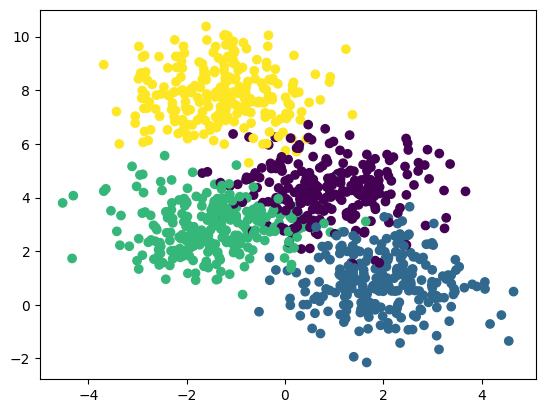

In [ ]:
plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

In [ ]:
## Train test split on the data
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(data,labels,stratify=labels ,test_size=0.2,random_state=0) #val = testing,random can be any number,stratify = the proportion of each class in the original dataset is maintained in both the training and testing sets
x_train,x_val,y_train,y_val = map(torch.tensor,(x_train,x_val,y_train,y_val))

In [ ]:
## Fit the model
import torch.nn as nn# Its is a set of classes that is used for the NN computation
import torch.nn.functional as F # For cross_entropy
import torch.optim as optim# Its for backward pass

In [ ]:
#def accuracy(y_hat,y):
  #pred = torch.argmax(y_hat,axis=1)
  #return (pred==y).float().mean()

In [ ]:
class FirstNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2,2)
    self.lin2 = nn.Linear(2,4)

  def forward(self,x):
    x = x.float()  # Cast input to float32
    a1 = self.lin1(x)# 2 -> 2
    h1= a1.sigmoid()
    a2 = self.lin2(h1)# 2 -> 4
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2  # You might want to return the output from the network

def accuracy(y_hat,y):
  pred = torch.argmax(y_hat,axis=1)
  return (pred==y).float().mean()

In [ ]:
def fit(epochs = 1000,learning_rate = 1):
  loss_arr = []
  acc_arr = []

  opt = optim.SGD( fn.parameters(),lr=learning_rate)#Stochastic Gradient Descent - SGD
  for epoch in range(epochs):
    y_hat = fn(x_train)  # Assuming you have defined x_train
    loss = F.cross_entropy(y_hat,y_train)
    loss_arr.append(loss.item())#We just need the item
    acc = accuracy(y_hat,y_train)
    acc_arr.append(acc.item())#We just need the item
    #print(loss,acc)
    #For Backward
    loss.backward()
    opt.step() # To go one step forward
    fn.zero_grad()# To make the graident to be zero that we can be new gradient to be zero
  print("Loss before the training",loss_arr[0])
  print("Loss after the training",loss_arr[-1])
  #print("Accuracy before the training",acc_arr[0])
  #print("Accuracy after the training",acc_arr[-1]
  plt.plot(loss_arr,'r')
  plt.plot(acc_arr,'b')
  plt.legend(['Loss','Accuracy'])
  plt.show()



Loss before the training 1.3951419591903687
Loss after the training 0.8717882037162781


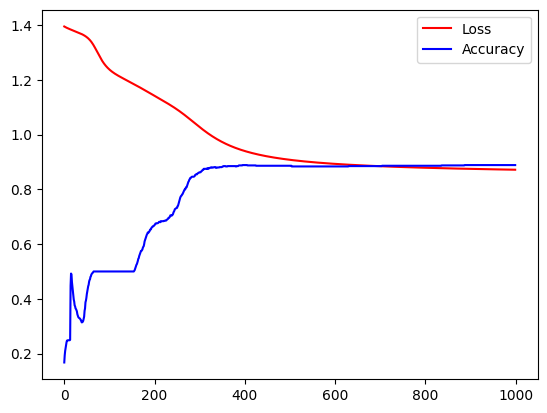

In [ ]:
fn = FirstNetwork()
fit()

In [ ]:
class FirstNetwork_Seq(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    # Its implimated in side
    self.net = nn.Sequential(
        nn.Linear(2,2),
        nn.Sigmoid(),
        nn.Linear(2,4),
        nn.Softmax()
    )

  def forward(self,x):
    x = x.float()
    return self.net(x)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Loss before the training 1.3951419591903687
Loss after the training 0.8717882037162781


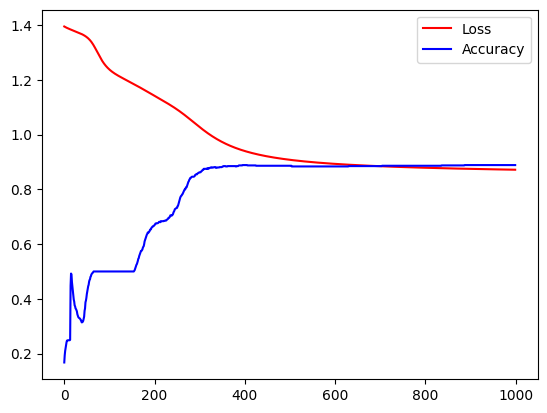

In [ ]:
fn = FirstNetwork_Seq()
fit()

## For iris Dataset

### Moving everything to GPU

In [ ]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
import time

x_train = x_train.to(device)
y_train = y_train.to(device)

fn= FirstNetwork_Seq()
fn.to(device)
tic = time.time()
fit()
toc = time.time()
print("Time taken",toc-tic)

NameError: name 'torch' is not defined

## CNN - Image

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
trainset = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/Colab Notebooks/Deep Learning/Data - CIFAR10', train=True,
                                        download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [ ]:
classes = trainset.classes

### Loading the Dataset in batch wise

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

#### single process data loading by iter

In [ ]:
images, labels = next(iter(trainloader))#Every time run the next batch is taken, We have length 2 ie image and label.
images.shape#4 - image, 3 - Feature Vector, 32 - width and
labels.shape# for ecah image one label is attached ie 4

torch.Size([4])

### Visualization

In [ ]:
def imshow(img):
  img = np.transpose(img,(1,2,0))# (1 dim - (32),2 dim - (32), 0 dim - (3))   or img = img.permute(1,2,0)
  plt.figure(figsize=(5,5))
  plt.imshow(img)
  plt.show()

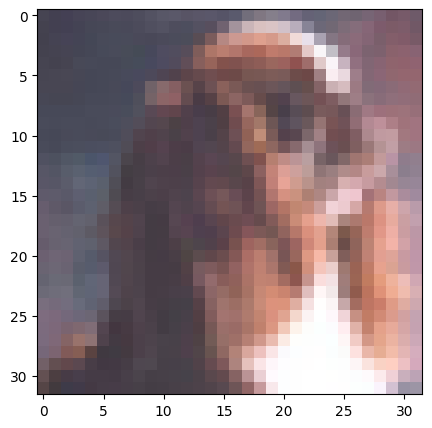

In [ ]:
img = images[0] # intial image 32x32 with 3 , we want each 32x32 should have on one 32x32
imshow(img)

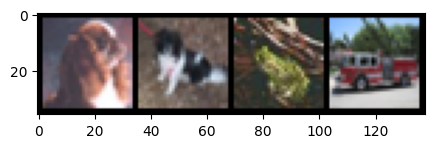

dog
dog
frog
truck


In [ ]:
imshow(torchvision.utils.make_grid(images))
for i in range (4):
  print(classes[labels[i]])

### Single CNN

In [ ]:
import torch.nn as nn

In [ ]:
class SingleCNN(nn.Module):
  def __init__(self):
    super(SingleCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,16,3)#nof of feature map = 3, 16 keranl, keranl size = 3
    #self.pool = nn.MaxPool2d(2,2)
    #self.conv2 = nn.Conv2d(6,16,5)
  def forward(self,x):
    return self.conv1(x)


In [ ]:
net = SingleCNN()
out = net(images)
out[0].shape# 16 - keranl with 30x30

torch.Size([16, 30, 30])

In [ ]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


#### What the kernal has learned?

In [ ]:
first_out = out[2,0,:,:]#[First Image, First Feature Map, taking all the size]
first_out.shape

torch.Size([30, 30])

<function matplotlib.pyplot.show(close=None, block=None)>

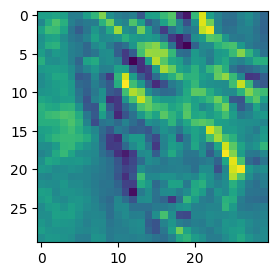

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(first_out.detach())
plt.show

## Deep CNN

In [ ]:
class DeepCNN(nn.Module):
  def __init__(self):
    super(DeepCNN,self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,16,3),# padding=(1,1),stride = 2 -> Size =(N,3,32,32) -> (N,16,30,30) --> N = Batch
        nn.AvgPool2d(2,stride=2),#(matrix size, stride (/ unit)) #Size --> (N,16,30,30) -> (N,16,15,15)
        nn.Conv2d(16,32,3)# Size --> (N,16,15,15) --> (N,32,13,13)
        #nn.ReLU()
    )
  def forward(self,x):
    x = self.model(x)
    #x = nn.functional.relu(x)
    #x = nn.functional.max_pool2d(x,(2,2))
    return x

In [ ]:
net = DeepCNN()
out = net(images)
out[0].shape

torch.Size([32, 13, 13])

In [ ]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])
torch.Size([32, 16, 3, 3])
torch.Size([32])


<function matplotlib.pyplot.show(close=None, block=None)>

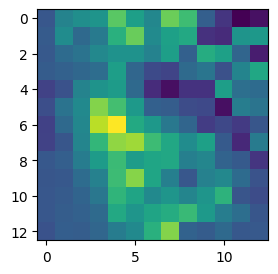

In [ ]:
first_out = out[2,0,:,:]#[First Image, First Feature Map, taking all the size]
first_out.shape
plt.figure(figsize=(3,3))
plt.imshow(first_out.detach())
plt.show

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) --> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5), #(N,6,14,14) -> (N,16,10,10)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)  # (N, 16, 10, 10) --> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),  # (N, 16 * 5 * 5) --> (N, 120)
            nn.Tanh(),
            nn.Linear(120, 84),  # (N, 120) --> (N, 84)
            nn.Tanh(),
            nn.Linear(84, 10)  # (N, 84) --> (N, 10)
        )

    def forward(self, x):
        #print(f"Input shape: {x.shape}")  # Debugging input shape
        x = self.cnn_model(x)
        #print(f"After CNN layers: {x.shape}")  # Debugging shape after CNN layers
        x = x.view(x.size(0), -1)  # Flatten the tensor
        #print(f"After flattening: {x.shape}")  # Debugging shape after flattening
        x = self.fc_model(x)
        #print(f"After fully connected layers: {x.shape}")  # Debugging shape after FC layers
        return x



In [ ]:

# Instantiate and test the model
net = LeNet()
out = net(images)  # Pass the images through the model
out

tensor([[ 0.0589, -0.0082, -0.0615, -0.0173, -0.0052, -0.0228, -0.0703,  0.0730,
          0.0077,  0.0018],
        [ 0.0645, -0.0033, -0.0585, -0.0235, -0.0139, -0.0260, -0.0805,  0.0655,
          0.0168,  0.0063],
        [ 0.0582, -0.0033, -0.0522, -0.0268, -0.0089, -0.0252, -0.0762,  0.0712,
          0.0118,  0.0165],
        [ 0.0656,  0.0026, -0.0546, -0.0274, -0.0087, -0.0217, -0.0795,  0.0725,
          0.0177,  0.0067]], grad_fn=<AddmmBackward0>)

In [ ]:
torch.max(out.data,1)#out.data give the o/p wiithout the grad_fn

torch.return_types.max(
values=tensor([0.0730, 0.0655, 0.0712, 0.0725]),
indices=tensor([7, 7, 7, 7]))

### Trianing Process

In [ ]:
batch_size = 5
trainloader = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/Colab Notebooks/Deep Learning/Data - CIFAR10', train=True,
                                        download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

testset = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/Colab Notebooks/Deep Learning/Data - CIFAR10', train=False,
                                        download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=True)

#classes = trainset.classes

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def evaluation(dataLoader):
  total,correct = 0,0
  for data in testloader:
    inputs,labels = data
    outputs = net(inputs)
    _,pred = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100*correct/total


In [ ]:
net = LeNet()

In [ ]:
import torch.optim as optim # Import the optim module from PyTorch
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
loss_arr=[]
loss_epoch_arr = []
max_epochs = 5

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels = data
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())
  print("Epoch",epoch,
        "Train Acc:", evaluation(trainloader),
        "Test Acc:", evaluation(testloader))
  #print(f"Epoch {epoch+1}/{max_epochs}, Loss: {loss.item()}")

Epoch 0 Train Acc: 50.32 Test Acc: 50.32
Epoch 1 Train Acc: 49.44 Test Acc: 49.44
Epoch 2 Train Acc: 51.68 Test Acc: 51.68
Epoch 3 Train Acc: 52.02 Test Acc: 52.02
Epoch 4 Train Acc: 51.31 Test Acc: 51.31


## Chat GPT

Using device: cuda:0


100%|██████████| 170M/170M [00:02<00:00, 78.6MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/5 - Loss: 1.6850
Train Accuracy: 46.26% | Test Accuracy: 46.43%
Epoch 2/5 - Loss: 1.4272
Train Accuracy: 51.13% | Test Accuracy: 50.40%
Epoch 3/5 - Loss: 1.3194
Train Accuracy: 55.90% | Test Accuracy: 54.17%
Epoch 4/5 - Loss: 1.2359
Train Accuracy: 57.33% | Test Accuracy: 54.85%
Epoch 5/5 - Loss: 1.1739
Train Accuracy: 59.54% | Test Accuracy: 56.67%


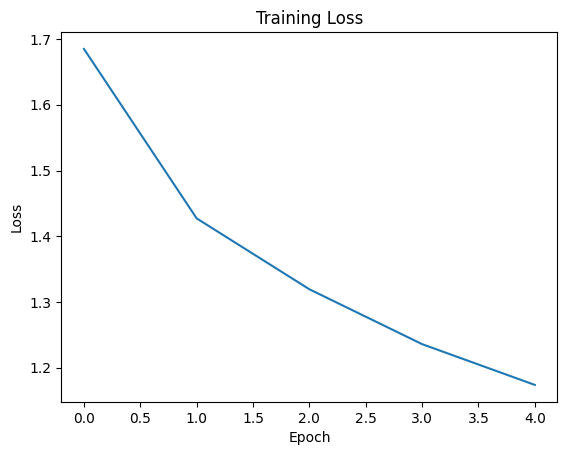

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# Check device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize CIFAR-10 images
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# LeNet Model with ReLU instead of Tanh
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),           # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),          # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),  # (N, 16*5*5) -> (N, 120)
            nn.ReLU(),
            nn.Linear(120, 84),          # (N, 120) -> (N, 84)
            nn.ReLU(),
            nn.Linear(84, 10)            # (N, 84) -> (N, 10)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc_model(x)
        return x

# Initialize the model, loss function, and optimizer
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Evaluation function
def evaluate(dataLoader):
    correct, total = 0, 0
    with torch.no_grad():  # No need to compute gradients during evaluation
        for data in dataLoader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Training the model
num_epochs = 5
train_loss_history = []

for epoch in range(num_epochs):
    net.train()  # Set the model to training mode
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()  # Backpropagation
        optimizer.step()  # Update the weights

        running_loss += loss.item()

    train_loss_history.append(running_loss / len(trainloader))
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {running_loss/len(trainloader):.4f}")
    train_accuracy = evaluate(trainloader)
    test_accuracy = evaluate(testloader)
    print(f"Train Accuracy: {train_accuracy:.2f}% | Test Accuracy: {test_accuracy:.2f}%")

# Optionally, plot the loss history
plt.plot(train_loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


# Do everthihng in GPU

In [ ]:
torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device(type='cuda', index=0)

In [ ]:
def evaluation(dataLoader):
  total,correct = 0,0
  for data in testloader:
    inputs,labels = data
    inputs,labels = inputs.to(device),labels.to(device) # Cal will done by GPU
    outputs = net(inputs)
    _,pred = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100*correct/total


In [ ]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
loss_arr=[]
loss_epoch_arr = []
max_epochs = 5

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels = data
    inputs,labels = inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())
  print("Epoch",epoch,
        "Train Acc:", evaluation(trainloader),
        "Test Acc:", evaluation(testloader))
  #print(f"Epoch {epoch+1}/{max_epochs}, Loss: {loss.item()}")

Epoch 0 Train Acc: 45.8 Test Acc: 45.8
Epoch 1 Train Acc: 48.48 Test Acc: 48.48
Epoch 2 Train Acc: 52.84 Test Acc: 52.84
Epoch 3 Train Acc: 54.61 Test Acc: 54.61
Epoch 4 Train Acc: 56.02 Test Acc: 56.02


## Task1
1. Use ReLu instead of torch.tanh.
2. Use L2 Regularizatrion when training.
3. Use MNIST Data(rem that grey scale).
4. Use different optimizer for the job.
